In [3]:
import numpy as np
c = np.random.uniform(size=(5,)) # wektor 5 pseudolosowych liczb
d = np.random.uniform(size=(5,)) # wektor 5 pseudolosowych liczb
print "c=",c
print "d=",d
print "min c=",c.min()
print "max d=",c.max()
print "iloczyn skalarany c i d", np.inner(c,d) 
#wektory z dużą liczbą współrzędnnych
c1 = np.random.uniform(size=(10000,)) # wektor 10000 pseudolosowych liczb
d1 = np.random.uniform(size=(10000,)) # wektor 10000 pseudolosowych liczb
print "iloczyn skalarany c1 i d1", np.inner(c1,d1) 

c= [ 0.37267125  0.00612247  0.6414589   0.16160556  0.06558478]
d= [ 0.59089923  0.58555891  0.91939938  0.3189096   0.00672937]
min c= 0.00612246543002
max d= 0.641458903487
iloczyn skalarany c i d 0.865532046423
iloczyn skalarany c1 i d1 2530.81474616


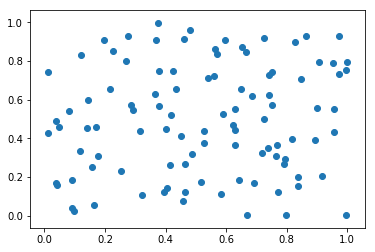

In [4]:

%matplotlib inline 
import matplotlib.pylab as plt
points = np.random.uniform(size=(100,2))
_=plt.scatter( np.random.uniform(size=100),np.random.uniform(size=100))


średnia długość kwiatka wynosi 5.84333333333


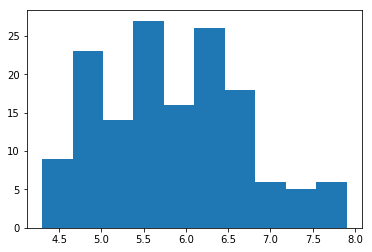

In [5]:

from sklearn.datasets import load_iris
iris = load_iris()
dlugosc_platka=iris.data[:,0]
print "średnia długość kwiatka wynosi",dlugosc_platka.mean()
_=plt.hist(dlugosc_platka)

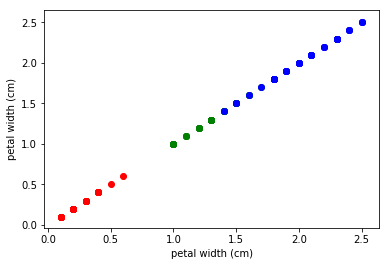

In [6]:
plt.scatter(iris.data[iris['target']==0, 3], iris.data[iris['target']==0, 3], color='r')
plt.scatter(iris.data[iris['target']==1, 3], iris.data[iris['target']==1, 3], color='g')
plt.scatter(iris.data[iris['target']==2, 3], iris.data[iris['target']==2, 3], color='b')
plt.xlabel(iris['feature_names'][3])
plt.ylabel(iris['feature_names'][3])

In [7]:
from sklearn.svm import LinearSVC
X,Y = iris.data[:,0:2], iris.target
Y = Y==0
pierwszy_model = LinearSVC() 
pierwszy_model.fit(X, Y)
v=pierwszy_model.coef_
def predict(z):
    if np.inner(pierwszy_model.coef_,z)+pierwszy_model.intercept_  >= 0 :
        return 1
    else:
        return 0

for x in np.linspace(-1, 1, 10):
    for y in np.linspace(-1, 1, 10):
        assert pierwszy_model.predict([[x, y]]) == predict([x, y]), "Failed on {},{}".format(x, y)


Dokładność modelu to:  100.0 %


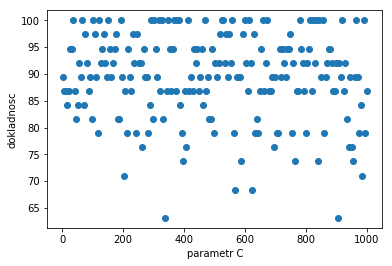

In [9]:
import sklearn
from sklearn.cross_validation import train_test_split
iris = load_iris()
X,Y = iris.data, iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1)
drugi_model = LinearSVC(C=10)
drugi_model.fit(X_train, Y_train)
Y_test_predicted = drugi_model.predict(X_test)
print "Dokładność modelu to: ",100*sklearn.metrics.accuracy_score(Y_test, Y_test_predicted), "%"
def dokladnosc(c):
    model = LinearSVC(C=c)
    model.fit(X_train, Y_train)
    Y_test_predicted = model.predict(X_test)
    return 100*sklearn.metrics.accuracy_score(Y_test, Y_test_predicted)
vec = np.linspace(0.5,1000,200)
_=plt.scatter(vec, [dokladnosc(x) for x in vec])
_=plt.xlabel("parametr C")
_=plt.ylabel("dokladnosc")